# BASEBALL CASE STUDY

in this model we will create a model which will predit the wins of team by the previous data.

IMPORT LIBRARIES

In [1]:
import numpy as np 
from sklearn.preprocessing import StandardScaler
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings ('ignore')

# Data collection

In [2]:
# loading the data set
df = pd.read_csv('baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
# check the n0. of rows and columns in the data set
df.shape

(30, 17)

In [4]:
# checking for missing values
df.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

as we see that we have not any null value in my data so i will continue without any change

# Data analysis

In [5]:
# statical measure of data set
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


till now we analyize the data, data seems good but we will check skewness of data through EDA

# Data Preprocessing (Analysis (EDA))

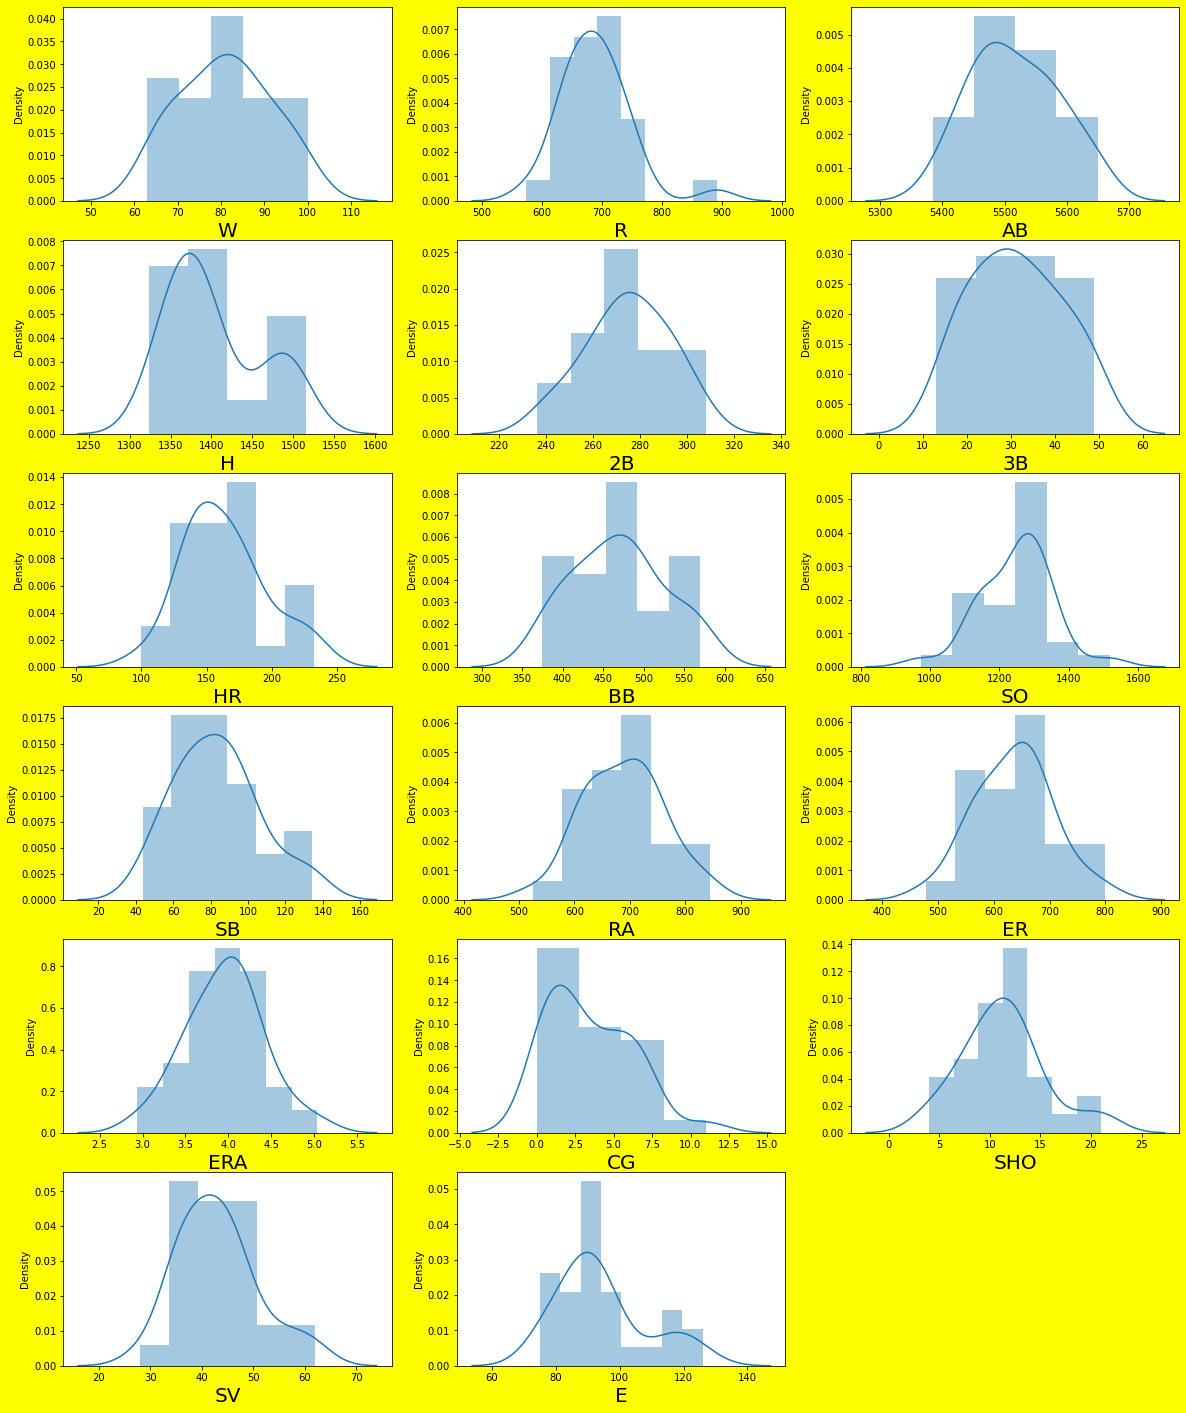

In [6]:
#Let's see how data is distributed for every column .it has skewness or not.
plt.figure(figsize=(20, 25), facecolor="yellow")
plotnumber= 1

for column in df:
    if plotnumber<=18:# as there are 17 columns in the data
        ax= plt.subplot(6,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1    
plt.show()

in the EDA ,data distribution is good , there is not any skewness in the data,and also not any o value,but i have doubt on some columns that has outliers,
so i want to go check the outliers in the data. 

In [7]:
x=df.drop(columns=['W'])# here in x we keep only features and drop label ,so we dropped W
y=df['W']  #here in y we keep only labels so we keep only W

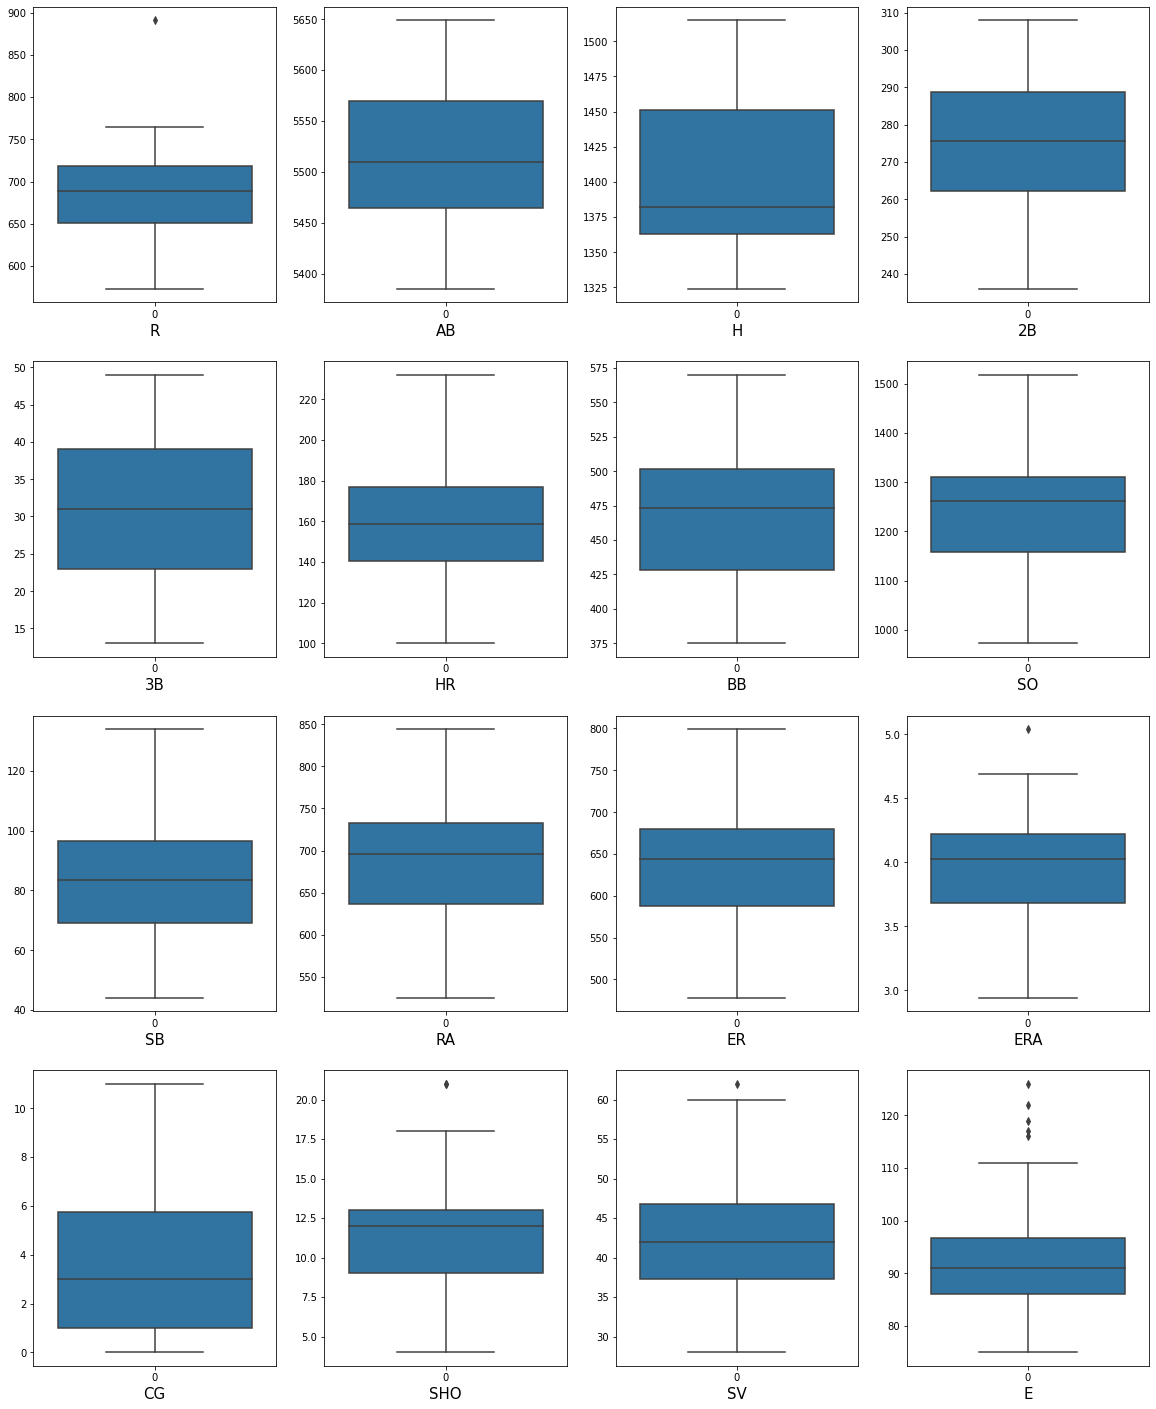

In [8]:
#Visualize the outliers using boxplot
plt.figure(figsize=(20,25)) 
graph = 1

for column in x:
    if graph<=16:
        plt.subplot(4,4, graph)
        ax=sns.boxplot(data= x [column])
        plt.xlabel(column, fontsize=15)
    graph+=1
    
plt.show()    
    

there are sme outliers but i am not going to delete any outlier bcoz my data is very less

In [9]:
x=df.drop(columns=['W'])# here in x we keep only features and drop label ,so we dropped W
y=df['W']  #here in y we keep only labels so we keep only W

In [10]:
print(x)

      R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0   724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1   696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2   669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3   622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4   689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   
5   891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   10   
6   764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3    4   
7   713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   10   
8   644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   12   
9   748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   10   
10  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5    9   
11  729  5459  1363  278  26  230  486  1392  121  618  572  3.5

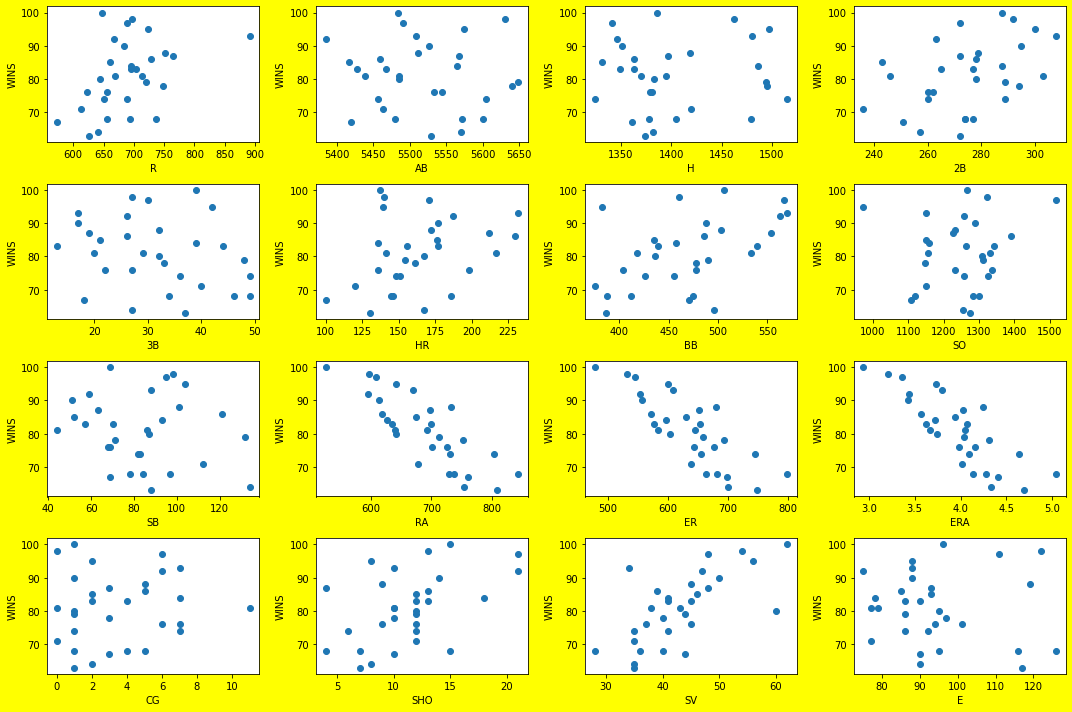

In [11]:
# now we visulize the relation ship
#scatter plot
plt.figure(figsize=(15,10), facecolor='yellow')
plotnumber = 1

for column in x:
    if plotnumber<=16:
        ax = plt.subplot (4,4, plotnumber) 
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('WINS',fontsize=10)

    plotnumber+=1 
plt.tight_layout()

now i can see all the features have not linear relation with lable , currently i am not going to delete any column ,
after checking prediction i will work on this non linear features

In [12]:
# data scaleing,    formula z=(x-mean)/std
scaler=StandardScaler()
x_scale=scaler.fit_transform(x)# we can use scaler only for features
x_scale

array([[ 0.61907797,  0.84773126,  1.66368512,  1.42017307,  1.04119304,
        -0.7872986 , -1.53490242, -2.69762957,  0.91388329, -0.66623393,
        -0.50511008, -0.50695519, -0.5398062 , -0.81462859,  1.67160651,
        -0.46146963],
       [ 0.13443166, -0.71109353, -0.97068076,  0.12740339,  1.23580856,
        -0.24396668, -0.5365919 ,  0.15487844, -0.60182558,  0.16597077,
         0.24892985,  0.25459752, -0.5398062 ,  0.1728    ,  0.24987932,
        -0.60719689],
       [-0.33290586, -1.1152333 , -0.15189137,  1.58879521, -0.22380785,
        -0.7233772 ,  1.13914361, -0.89398189,  0.11144918, -0.68033909,
        -0.75162313, -0.64134684,  2.77264091, -0.32091429, -0.65485616,
        -1.11724227],
       [-1.14641931,  0.24152162, -0.40108814, -0.82812203, -0.41842337,
        -0.8831807 , -1.16053598, -0.16860185, -0.69098493,  0.18007593,
         0.10392217,  0.05301004,  1.3004422 , -0.56777144, -0.78410408,
         0.48575751],
       [ 0.01327008,  1.28073815,  1

In [13]:
#split data into train and test model and model will be build on trained and tested data
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=.25,random_state=348)
#by default test_size is .25 and we can give any no in random_state.
y_train

15    100
11     86
4      74
12     85
24     63
28     74
16     98
9      78
10     88
1      83
29     68
13     76
26     84
7      81
6      87
18     68
0      95
14     68
3      76
21     83
8      80
19     64
Name: W, dtype: int64

# model instantiating and training

linear regression model

In [14]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

# predict the chance of win

In [15]:
df.tail(2)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [16]:
print('the chance of win :> ',lm.predict(scaler.transform([[737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95]])))
# we gave the info of 30th team

the chance of win :>  [67.96940271]


so we can see that my model is giving 67.96 and actually it is 68 so my model is working accuretly 

In [17]:
# let's check how well model fits in train data
# from adjusted r^2 score
lm.score(x_train,y_train)

0.9687969317509284

training % is good

In [18]:
# let's check how well model fits in train data
# from adjusted r^2 score
lm.score(x_test,y_test)

0.25933768290449577

it is not good.

In [19]:
# lets plot and visualize
y_pred= lm.predict(x_test)

In [20]:
y_pred

array([ 91.52398158,  84.73068706,  78.19851814,  78.80704391,
        57.9130671 , 105.2632438 ,  85.9046416 ,  78.90617752])

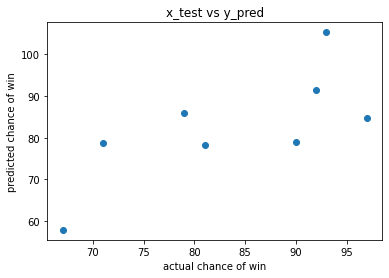

In [21]:
# now i compaire the y_test and y_pred what is the diff?
plt.scatter(y_test,y_pred)
plt.xlabel('actual chance of win')
plt.ylabel('predicted chance of win')
plt.title('x_test vs y_pred')
plt.show()

by above graph we can see that our model is good so i am going so save my model

In [22]:
# now save the model 
pickle.dump(lm,open('lmbaseball_model','wb'))# lmbaseball_model is the new name of file and wb is for write

In [23]:
# prediction using the save model
loaded_model=pickle.load(open('lmbaseball_model','rb'))
a=loaded_model.predict(scaler.transform([[737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95]]))
a

array([67.96940271])

# MODEL EVALUTION

In [24]:
y_pred= lm.predict(x_test)

In [25]:
# MAE
mean_absolute_error(y_test,y_pred)


7.837812239187722

In [26]:
# MSE
mean_squared_error(y_test,y_pred)


77.90841747948335

In [27]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

8.826574504273067

KNN regression

In [28]:
##Initiate KNeighbors regressor
knn=KNeighborsRegressor()
#model training
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [29]:
print('the chance of win :> ',lm.predict(scaler.transform([[737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95]])))
# we gave the info of 30th team

the chance of win :>  [67.96940271]


In [30]:
# now save the model 
pickle.dump(lm,open('knnbaseball_model','wb'))# knnbaseball_model is the new name of file and wb is for write

In [31]:
# prediction using the save model
loaded_model=pickle.load(open('lmbaseball_model','rb'))
a=loaded_model.predict(scaler.transform([[737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95]]))
a

array([67.96940271])

# MODEL EVALUTION

In [32]:
y_pred= knn.predict(x_test)

In [33]:
# MAE
mean_absolute_error(y_test,y_pred)


5.9

In [34]:
# MSE
mean_squared_error(y_test,y_pred)


49.66

In [35]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

7.046985170979147

In [36]:
# let's check how well model fits in train data
# from adjusted r^2 score
knn.score(x_train,y_train)

0.6976487992704429

In [37]:
# let's check how well model fits in test  data.
knn.score(x_test,y_test)

0.5278906714200833

In [38]:
# lets plot and visualize
y_pred= knn.predict(x_test)

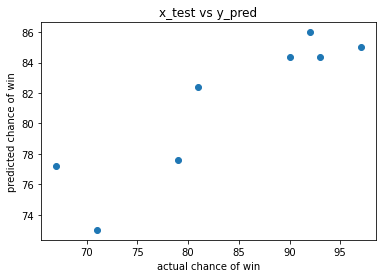

In [39]:
# now i compaire the y_test and y_pred what is the diff?
plt.scatter(y_test,y_pred)
plt.xlabel('actual chance of win')
plt.ylabel('predicted chance of win')
plt.title('x_test vs y_pred')
plt.show()

by the graph we can see that there is not big diff bw linear regression and knn regression

so till now we can see in both model my adjusted r2 score is not justify so now iam going to regularization

# REGULARIZATION

BY LASSO

In [40]:
#LassoCV will return best alpha after max iteration 
#Normalize is subtracting the mean and dividing by the L2-norm 
lasscv = LassoCV(alphas=None, max_iter= 100, normalize = True) 
lasscv.fit(x_train, y_train)

LassoCV(max_iter=100, normalize=True)

In [41]:
# best alpha parameter
alpha=lasscv.alpha_
alpha

0.24970636220853143

In [42]:
#Now that we have best parameter, Let's use Lasso regression and see how well our data has  
#fitted before

lasso_reg =Lasso (alpha)
lasso_reg.fit(x_train, y_train)


Lasso(alpha=0.24970636220853143)

In [43]:
lasso_reg.score (x_test, y_test)

0.8957350184648305

In [44]:
lasso_reg.score (x_train, y_train)

0.9150424036461222

NOW WE CAN SEE THAT AFTER REGULARIZATION MY TRAIN AND TEST SCORES HAVE NOT MUCH   DIFFERENCE NOW IT SEEMS GOOD